# Séries Temporais

## Índice

* Suavização Exponencial
* Decomposição de Série Temporal
* Média Móvel (MA)
* Autorregreção (AR)
* ARMA
* ARIMA
* SARIMA
* SARIMAX
* Análise Espectral
* Modelos de Espaço de Estado
* Análise de Volatilidade: ARCH (Autoregressive Conditional Heteroskedasticity) e GARCH (Generalized Autoregressive Conditional Heteroskedasticity).
* Modelos de Vetores Autoregressivos (VAR)
* Redes Neurais Recorrentes (RNN)
* Modelos de Componentes Não Observados (UCM)
* Modelos de Máquinas de Vetores de Suporte

## Preparação

É imprescindível transformar os dados em um formato de séries temporais.

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [68]:
ts = pd.read_csv('..\\ArquivosParalelos\\vendas_timeseries.csv')

In [69]:
ts.shape

(365, 2)

In [70]:
ts.columns

Index(['Data', 'Total_Vendas'], dtype='object')

In [71]:
ts.describe()

,Total_Vendas
count,365.000000
mean,59.152472
std,10.056436
min,33.265284
25%,51.496725
50%,59.165362
75%,66.610772
max,84.430251


In [72]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Data          365 non-null    object 
 1   Total_Vendas  365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [73]:
ts.head(20)

,Data,Total_Vendas
0,2023-01-01,53.483571
1,2023-01-02,57.176993
2,2023-01-03,63.087722
3,2023-01-04,62.103987
4,2023-01-05,44.690396
5,2023-01-06,39.330036
6,2023-01-07,50.377749
7,2023-01-08,54.187174
8,2023-01-09,55.870943
9,2023-01-10,62.912079


In [74]:
ts['Data'].min()

'2023-01-01'

In [75]:
ts['Data'].max()

'2023-12-31'

A data deverá ser o índice da tabela.

In [76]:
ts['Data'] = pd.to_datetime(ts['Data'])

In [77]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Data          365 non-null    datetime64[ns]
 1   Total_Vendas  365 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [78]:
# O tipo, por enquanto, é um dataframe
type(ts)

pandas.core.frame.DataFrame

In [79]:
# Transforma o dataframe em série temporal e atribui a frequência como diária
ts = ts.set_index('Data')['Total_Vendas'].asfreq('D')

# .asfreq pode ser feito posteriormente

In [80]:
# O tipo se converte a Série
type(ts)

pandas.core.series.Series

In [81]:
ts.head()

Data
2023-01-01    53.483571
2023-01-02    57.176993
2023-01-03    63.087722
2023-01-04    62.103987
2023-01-05    44.690396
Freq: D, Name: Total_Vendas, dtype: float64

## Análise Exploratória

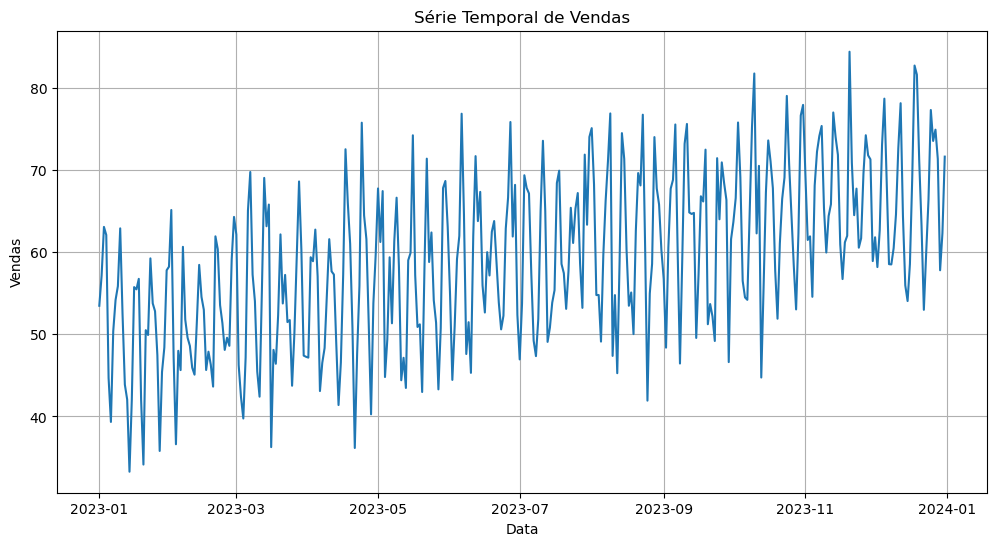

In [82]:
plt.figure(figsize = (12, 6))
plt.plot(ts)
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.title('Série Temporal de Vendas')
plt.grid(True)
plt.show()

## Suavização Exponencial

é baseada em uma média ponderada dos valores observados ao longo do tempo, em que a ponderação diminui exponencialmente à medida que os dados ficam mais distantes no tempo. Cada valor da série é calculado como uma combinação ponderada do valor atual e da previsão anterior.

Tipos de suavização exponencial:

* ``Suavização Exponencial Simples (SES)``: Utiliza um único fator de suavização. A previsão atual é calculada como uma combinação ponderada entre o valor atual e a previsão anterior. A ponderação atribuída ao valor anterior é controlada pelo fator de suavização, que deve estar entre 0 e 1.

* ``Suavização Exponencial de Tendência (ETS)``: Este método expande o SES adicionando um componente de tendência. Ele é adequado para séries temporais que exibem uma tendência ascendente ou descendente. A previsão atual é calculada como uma combinação ponderada entre o valor atual, a previsão anterior e a estimativa da tendência.

* ``Suavização Exponencial sazonal (SES sazonal)``: Também considera padrões sazonais nos dados. É adequada para séries temporais com comportamento sazonal, como vendas que variam ao longo do ano devido a festas ou estações. O método incorpora fatores de sazonalidade para ajustar as previsões com base em padrões sazonais passados.

### Pressupostos

* ``Estacionariedade``: assume que a série temporal é estacionária, o que significa que a média e a variância dos dados não mudam significativamente ao longo do tempo. A estacionariedade é importante para garantir que os padrões observados na série sejam consistentes e possam ser extrapolados para previsões futuras.

* ``Independência dos erros``: A suavização exponencial assume que os erros de previsão são independentes e seguem uma distribuição normal com média zero. Isso implica que não há correlação serial entre os erros de previsão e que a variância dos erros é constante ao longo do tempo.

Suposições específicas para cada tipo de suavização exponencial:

* ``Suavização Exponencial Simples`` (SES): Assume que a série temporal não possui tendência ou sazonalidade. Ele é adequado para séries temporais que são relativamente estáveis ao longo do tempo, sem tendências significativas ou padrões sazonais.

* ``Suavização Exponencial de Tendência`` (ETS): Assume a presença de uma tendência linear na série temporal. Ele incorpora um componente de tendência para capturar e prever a direção e a magnitude da tendência.

* ``Suavização Exponencial Sazonal`` (SES sazonal): Assume que a série temporal possui padrões sazonais que se repetem regularmente. Ele incorpora fatores de sazonalidade para ajustar as previsões de acordo com esses padrões sazonais.

In [83]:
# Teste de estacionaridade.
# teste de Dickey-Fuller aumentado (ADF - Augmented Dickey-Fuller test)

from statsmodels.tsa.stattools import adfuller

# Realizando o teste de Dickey-Fuller aumentado
result = adfuller(ts)
print(result)

# Obtendo o valor-p do teste
p_value = result[1]

# Interpretando o resultado
if p_value < 0.05:
    print("A série é estacionária.")
else:
    print("A série é não estacionária.")


(-0.8498319368804128, 0.8040444991286606, 14, 350, {'1%': -3.4491725955218655, '5%': -2.8698334971428574, '10%': -2.5711883591836733}, 2146.574513534108)
A série é não estacionária.


### Modelo

# 

In [86]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

modelo = SimpleExpSmoothing(ts)

ajuste = modelo.fit(smoothing_level=0.2)

valores  = ajuste.fittedvalues

cast = ajuste.fittedfcast

Parâmetro de suavização:

In [87]:
print(valores)

Data
2023-01-01    53.992035
2023-01-02    53.890342
2023-01-03    54.547672
2023-01-04    56.255682
2023-01-05    57.425343
                ...    
2023-12-27    68.660021
2023-12-28    69.915131
2023-12-29    70.207076
2023-12-30    67.727045
2023-12-31    66.649685
Freq: D, Length: 365, dtype: float64


In [88]:
print(cast)

[53.99203463 53.89034186 54.54767215 56.25568208 57.425343   54.87835355
 51.76869006 51.4905019  52.02983625 52.79805758 54.82086193 54.36103933
 52.26533423 50.22437383 46.83255586 45.88112685 47.85627692 49.38204624
 50.8576518  49.09032989 46.10010438 46.98206931 47.56987915 49.90709449
 50.68078323 51.10801134 50.37956418 47.46280194 47.05227661 47.3211826
 49.41891529 51.18328145 53.97667082 52.62007195 49.41849081 49.13367459
 48.43609603 50.88140338 51.0653084  50.77182815 50.33655628 49.45785578
 48.58398994 49.17154367 51.02979421 51.7351692  51.98605863 50.72044065
 50.15361892 49.38285046 48.23324022 50.97433911 52.85424483 52.99424134
 52.66930188 51.75658521 51.32288532 50.77909073 52.44772317 54.8192978
 56.28875084 54.28405896 51.90173236 49.47138795 49.01090374 52.22491178
 55.73602528 56.04457758 55.64142748 53.60492219 51.36515503 52.15351963
 55.53451523 57.06164197 58.81172471 54.30186719 53.06354043 51.73421645
 51.85836581 53.92211639 53.88998002 54.56007961 53.9

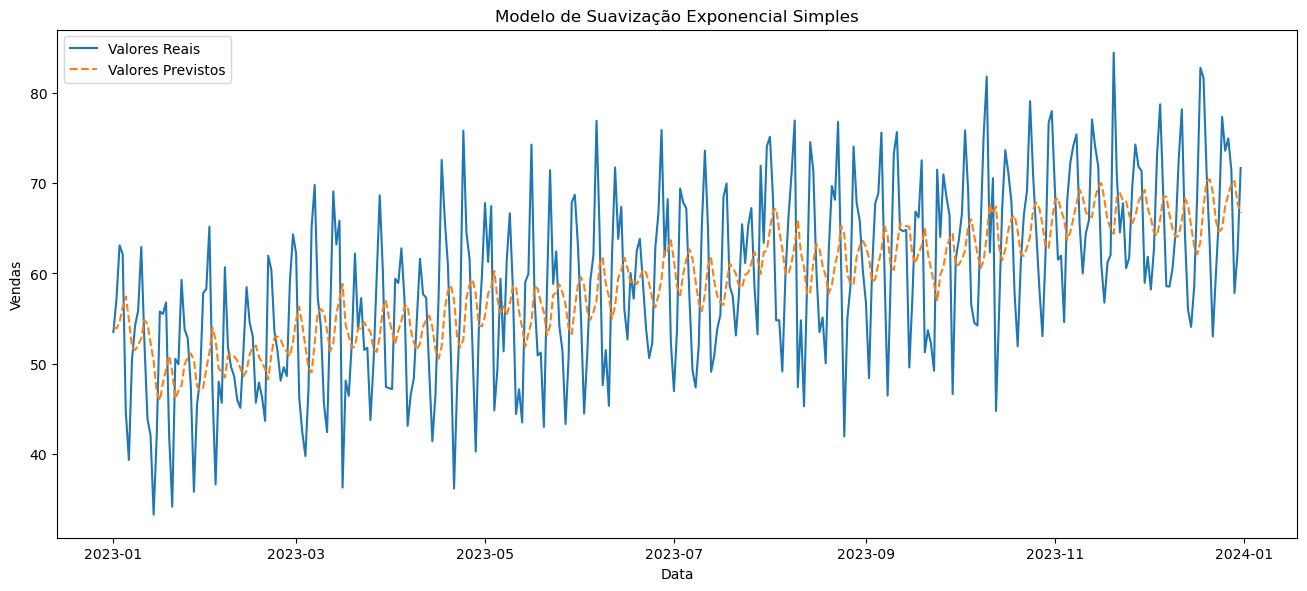

In [89]:
plt.figure(figsize = (16, 6.6))
plt.plot(ts, label = 'Valores Reais')
plt.plot(valores, label = 'Valores Previstos', linestyle = '--')
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.title('Modelo de Suavização Exponencial Simples')
plt.legend()
plt.show()

In [90]:
# Previsão

Previsão = ajuste.forecast(steps = 5)
# steps: de pontos previstos

print(Previsão)

2024-01-01    67.649892
2024-01-02    67.649892
2024-01-03    67.649892
2024-01-04    67.649892
2024-01-05    67.649892
Freq: D, dtype: float64


In [94]:
# Teste de independência dos erros.
# Teste Ljung-Box

from statsmodels.stats.diagnostic import acorr_ljungbox

# Resíduos do modelo de série temporal (substitua pelos seus próprios resíduos)
residuos = ts - valores

print(type(acorr_ljungbox(residuos)))

# Realizando o teste de Ljung-Box
resultado = acorr_ljungbox(residuos, lags = 10) # O número de lags dará o mesmo número de p-valores
print(resultado)

# Interpretando o resultado
if any(p < 0.05 for p in resultado['lb_pvalue']):
    print("Os resíduos apresentam autocorrelação.")
else:
    print("Os resíduos são independentes.")

<class 'pandas.core.frame.DataFrame'>
       lb_stat      lb_pvalue
1    54.083346   1.921631e-13
2    66.416572   3.782898e-15
3   209.817841   3.188241e-45
4   372.578276   2.334361e-79
5   380.281381   5.264358e-80
6   450.531493   3.771772e-94
7   623.050435  2.642176e-130
8   685.883784  7.826071e-143
9   693.001657  2.209628e-143
10  838.259525  1.223473e-173
Os resíduos apresentam autocorrelação.


In [85]:
# Teste de independência dos erros.
# Teste de Portmanteau.